# Outliers con metodi di dim reduction per visualizzazione
- Identify the top 1% outliers: adopt at least three different methods
from different families (e.g., density-based, angle-based…) and
compare the results.
- Visualize the outliers in a 2 or 3d scatter plot using at least one
dimensionality reduction technique.
- Deal with the outliers in a way you see fit, e.g. by removing them from
the dataset or by treating the anomalous variables as missing values
and employing replacement techniques. In this second case, you
should check that the outliers are not outliers anymore. Justify your
choices in every step.

potremmo fare che scegliamo i 3 metodi, dopodiche etichettiamo con 3 nuove colonne le osservazioni ritenute outliers da i 3 metodi e infine eliminiamo quelle che sono outlieer per tutti e tre i meotodi.

Dopo aver scartato l’approccio Likelihood, si è deciso di confrontare i risultati ottenuti da LOF, ABOD e Isolation Forest. Nel fare ciò, sono state stilate 3 nuove colonne contenenti i risultati degli algoritmi e si è deciso di rimuovere dal dataset gli outliers che risultavano essere comuni in tutti e tre gli approcci. Confrontando, dunque, le loro colonne si è ottenuto un totale di 31 outliers, i quali sono stati rimossi dal dataset seppur non ottenendo miglioramenti nella classificazione, in quanto considerato un numero pressoché irrilevante rispetto al numero totale di osservazioni e considerato, inoltre, come “rumore”.

DENSITY-BASED: LOF(2 librerie), COF, dbscan\
(high-dimensional) ANGLE-BASED: ABOD\
DISTANCE-BASED: KNN\
ENSABLE-BASED: LODA, feature bagging\
MODEL-BASED: isolation forest\
Depth-based Approaches: ellenv


provo direttamente: LOF, ABOD, ISOLATION FOREST, KNN

In [170]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from collections import defaultdict

In [171]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [172]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Optional: KNN
from sklearn.neighbors import KNeighborsClassifier

##### Decision Tree Visualization ###
#from sklearn.tree import export_graphviz
from sklearn import tree # export_graphviz() method
#import pydotplus # viz stuff
from IPython.display import Image # viz stuff
from sklearn.ensemble import RandomForestClassifier
####################################

######## Evaluation #######
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay

# Optional: baseline comparison
from sklearn.dummy import DummyClassifier
###########################

# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# cross-validation
from sklearn.model_selection import cross_val_score

from sklearn.metrics import DetCurveDisplay, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import zero_one_loss
from sklearn.neighbors import KNeighborsClassifier

from sklearn.manifold import TSNE

In [173]:
#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import DBSCAN
#evaluation
from sklearn.metrics import silhouette_score

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import kmeans_plusplus
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.loci import LOCI

In [174]:
df = pd.read_csv(r'C:\Users\HUAWEI\Desktop\DM2\project NEW\output_data\df_final2.csv') 
df.head()

duration_ms  popularity  danceability    energy  loudness  speechiness  \
0     0.797420    0.947858     -0.186041 -0.472092 -0.588997     1.938632   
1     2.550119    0.623286      1.063136 -1.167680 -1.142236    -1.067093   
2     0.543118    0.345082      1.355375  0.007353 -0.764607     1.004903   
3     1.592682   -1.463244      0.633373 -0.369915 -1.010613     0.366106   
4     0.385608   -1.463244      1.126168  0.133109 -1.234849    -0.443351   

   acousticness  instrumentalness  liveness   valence  ...  mode_confidence  \
0      0.659428          1.766613 -0.889812 -0.888017  ...         0.079080   
1     -0.469639          1.816690 -0.530867 -1.246693  ...         0.430642   
2     -0.879669          1.718254 -1.272670 -0.578946  ...         1.369974   
3     -0.822027          1.836646 -0.443037 -1.657261  ...        -0.041770   
4      0.558406          1.867806 -0.401379 -1.345901  ...        -0.283469   

    n_beats  popularity_artist  followers_artist  explicit  key  mode  \
0  1.152045           0.157456         -0.277164         0    0     1   
1  2.193447          -0.067569         -0.275450         0    5     0   
2  0.435994          -0.236338         -0.292966         0    7     0   
3  1.533392          -0.573877         -0.286607         0    6     0   
4  0.335164          -0.180082         -0.273545         0   11     0   

   time_signature           genre  emotion  
0               3  minimal-techno  nervous  
1               4  minimal-techno    bored  
2               3  minimal-techno  nervous  
3               4  minimal-techno  nervous  
4               4  minimal-techno  nervous  

[5 rows x 24 columns]

In [175]:
df.shape

(89068, 24)

#### preparazione

In [176]:
print(len(df.columns))
          
df.columns

24


Index(['duration_ms', 'popularity', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'tempo_confidence', 'time_signature_confidence',
       'key_confidence', 'mode_confidence', 'n_beats', 'popularity_artist',
       'followers_artist', 'explicit', 'key', 'mode', 'time_signature',
       'genre', 'emotion'],
      dtype='object')

In [177]:

num =['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'tempo_confidence', 'time_signature_confidence',
         'key_confidence', 'mode_confidence', 'n_beats', 'popularity_artist', 'followers_artist', 'popularity']

cat = ['explicit', 'key','mode','time_signature','genre', 'emotion']

print(len(num))
print(len(cat))

18
6


In [178]:
df_num = df.drop(cat, axis=1)
X = df_num.values
X

array([[ 0.79742041,  0.9478578 , -0.1860407 , ...,  1.15204456,
         0.15745644, -0.27716399],
       [ 2.55011862,  0.62328642,  1.06313604, ...,  2.19344657,
        -0.0675692 , -0.2754504 ],
       [ 0.54311811,  0.34508238,  1.35537463, ...,  0.4359941 ,
        -0.23633843, -0.29296601],
       ...,
       [-0.23587414,  2.24614332,  1.42413665, ..., -0.02707194,
         1.92953336,  1.72576479],
       [-0.0735322 ,  1.31879652,  0.50730969, ..., -0.34072076,
        -0.32072304, -0.30130623],
       [-0.14666384,  1.1796945 ,  1.16627907, ..., -0.67787929,
        -0.48949227,  0.04739879]])

In [179]:
X.shape

(89068, 18)

visualizzazione

La scelta di utilizzare la PCA, l'ISOMAP o il t-SNE per la visualizzazione dei dati dipende dalla struttura e dalle dimensioni del dataset, nonché dagli obiettivi specifici dell'analisi. Ecco alcuni suggerimenti su quando conviene utilizzare ciascuna tecnica:

1. **PCA (Principal Component Analysis)**:
   - **Dimensionalità elevata**: La PCA è particolarmente utile quando si lavora con dataset ad alta dimensionalità in cui è difficile visualizzare i dati. Riduce le dimensioni del dataset mantenendo la massima varianza possibile.
   - **Linearità dei dati**: La PCA è efficace quando i dati mostrano una struttura lineare, cioè quando le relazioni tra le variabili sono lineari.
   - **Esplorazione iniziale dei dati**: La PCA è spesso utilizzata come prima tecnica di riduzione della dimensionalità per ottenere una panoramica generale della struttura dei dati.

2. **ISOMAP**:
   - **Struttura non lineare**: L'ISOMAP è utile quando i dati hanno una struttura intrinsecamente non lineare, ad esempio quando sono distribuiti su una varietà o su una superficie curva nello spazio.
   - **Manifold learning**: L'ISOMAP è una tecnica di manifold learning che cerca di preservare le distanze geodetiche tra i punti, quindi è adatto per dataset che possono essere rappresentati come varietà o superfici complesse.

3. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**:
   - **Struttura complessa**: Il t-SNE è particolarmente utile quando i dati hanno una struttura complessa e sono distribuiti in maniera non lineare nello spazio.
   - **Visualizzazione dettagliata**: Il t-SNE è efficace per la visualizzazione dei dati in spazi di dimensioni ridotte mantenendo la struttura locale dei dati, quindi è adatto per identificare cluster, pattern o outlier.
   - **Attenzione**: Il t-SNE può soffrire di sovrapposizioni o di distorsioni, quindi è importante interpretare i risultati con cautela e fare attenzione a non sovrastimare le strutture presenti nei dati.

In generale, la PCA è una buona scelta per una prima esplorazione dei dati ad alta dimensionalità, mentre l'ISOMAP e il t-SNE sono più adatti per dati con strutture non lineari complesse o per visualizzare dettagli nei dati in uno spazio di dimensioni ridotte. È consigliabile esplorare e confrontare diverse tecniche per ottenere una comprensione completa della struttura dei tuoi dati.

In [180]:
from sklearn.decomposition import PCA

# Riduci la dimensionalità utilizzando PCA
pca = PCA(n_components=2)  # Scegli il numero di componenti principali desiderate
X_pca = pca.fit_transform(X)


C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_14956\1040472942.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='muted', alpha=0.5,  s=10)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


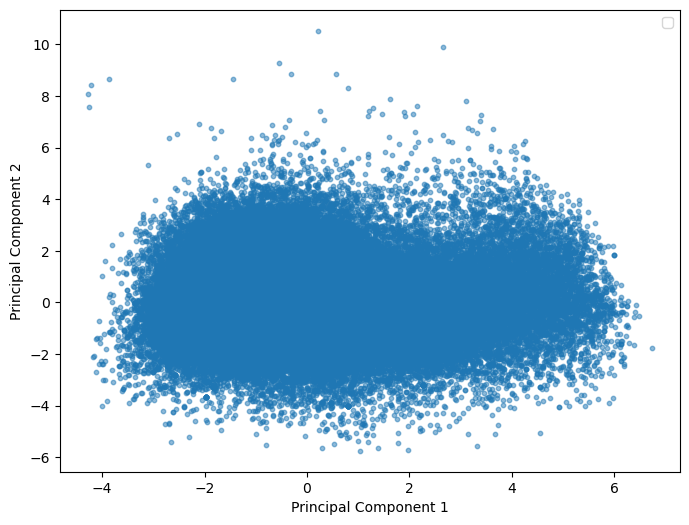

In [181]:
# Plot dei punti ridotti
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='muted', alpha=0.5,  s=10)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [182]:
#tsne
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X) 

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_14956\4294685445.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap='muted', alpha=0.5,  s=10) # s=10


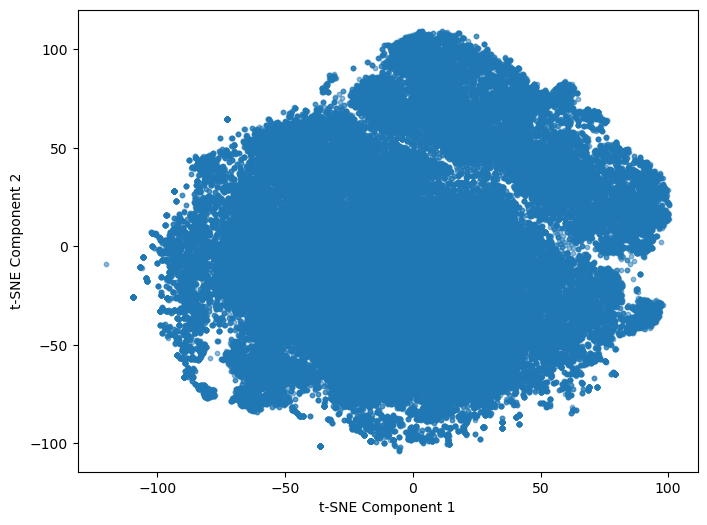

In [183]:
# Plotta i dati t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap='muted', alpha=0.5,  s=10) # s=10

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [184]:
#imposto colore

palette = 'dark'  # 'deep', 'muted', 'bright', 'pastel', 'dark', 'colorblind'

# Distance-based Approaches

## kNN
provare con diversi NN

In [185]:
from pyod.models.knn import KNN

In [186]:
clf = KNN(n_neighbors=10, contamination=0.05)
clf.fit(X)

KNN(algorithm='auto', contamination=0.05, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=10, p=2,
  radius=1.0)

In [187]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([84983,  4085], dtype=int64))

In [188]:
# Ottieni gli indici degli outlier
outlier_knn = np.where(outliers == 1)[0]

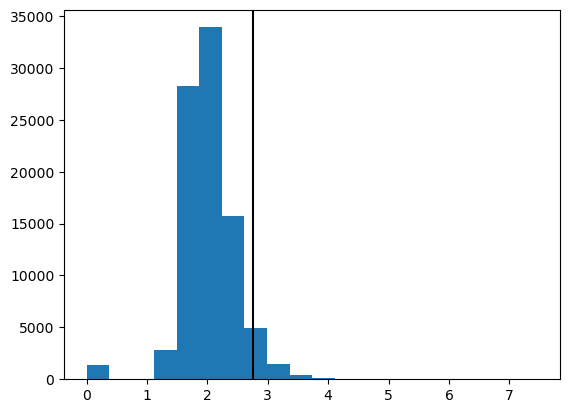

In [189]:
plt.hist(clf.decision_scores_, bins=20)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()

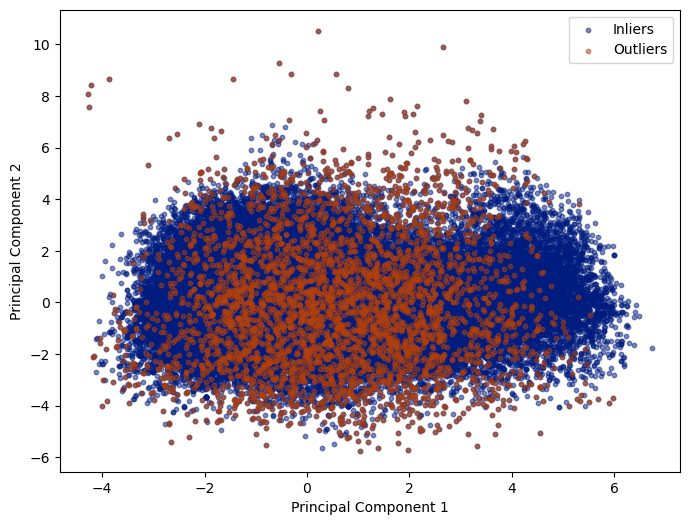

In [190]:
plt.figure(figsize=(8, 6))

plt.scatter(X_pca[:, 0], X_pca[:, 1], label='Inliers', color=sns.color_palette(palette)[0],  alpha=0.5,  s=10)
plt.scatter(X_pca[outlier_knn, 0], X_pca[outlier_knn, 1], label='Outliers', color=sns.color_palette(palette)[1],alpha=0.5,  s=10)

#plt.title('PCA plot of outliers detected by KNN')
# Etichette degli assi
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.legend()
plt.show()



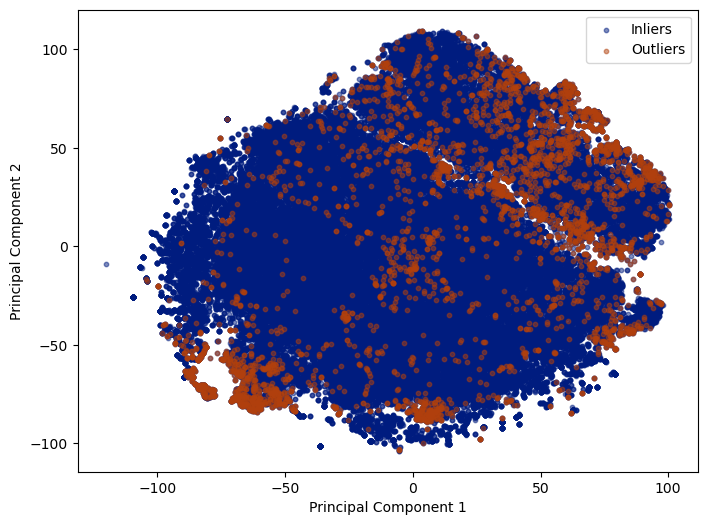

In [191]:

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], label='Inliers', color=sns.color_palette(palette)[0],  alpha=0.5,  s=10)
plt.scatter(X_tsne[outlier_knn, 0], X_tsne[outlier_knn, 1], label='Outliers', color=sns.color_palette(palette)[1],  alpha=0.5,  s=10)
#plt.title('t-sne plot of outliers detected by KNN')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Density-based Approach

## LOF (pymod)

In [192]:
from pyod.models.lof import LOF

In [193]:
clf = LOF(n_neighbors=10, contamination=0.05)
clf.fit(X)

LOF(algorithm='auto', contamination=0.05, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=10, novelty=True, p=2)

In [194]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([85987,  3081], dtype=int64))

In [195]:
# Ottieni gli indici degli outlier
outlier_lof = np.where(outliers == 1)[0]

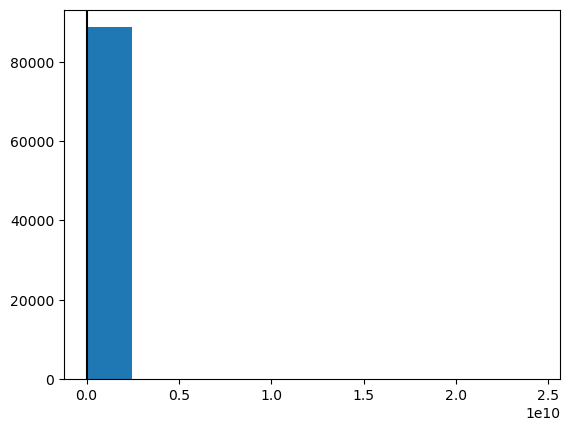

In [196]:
plt.hist(clf.decision_scores_, bins=10)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()

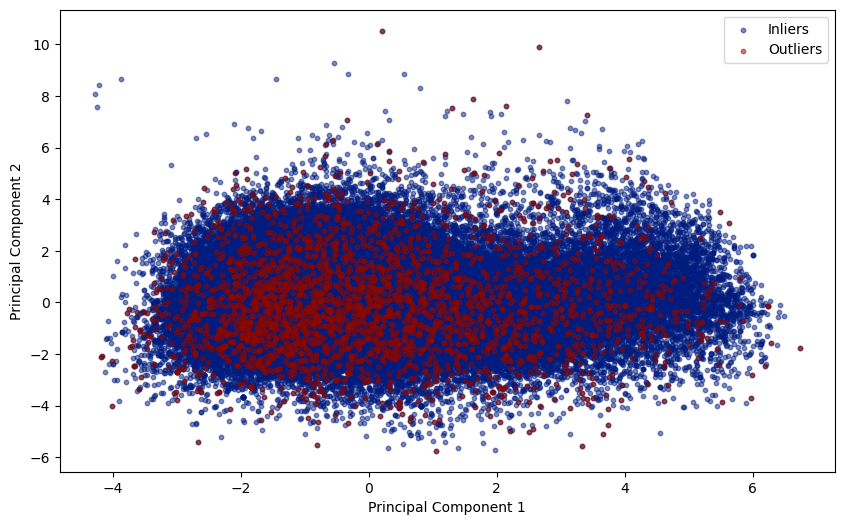

In [197]:
# Plot dei punti ridotti
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], label='Inliers', color=sns.color_palette(palette)[0],  alpha=0.5,  s=10)
plt.scatter(X_pca[outlier_lof, 0], X_pca[outlier_lof, 1], label='Outliers',color=sns.color_palette(palette)[3],  alpha=0.5,  s=10)
#plt.title('PCA plot of outliers detected by LOF')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


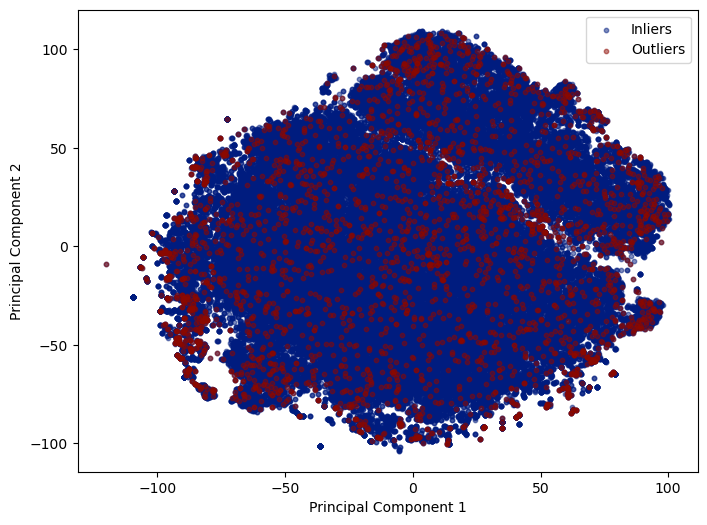

In [198]:

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], label='Inliers', color=sns.color_palette(palette)[0],  alpha=0.5,  s=10)
plt.scatter(X_tsne[outlier_lof, 0], X_tsne[outlier_lof, 1], label='Outliers', color=sns.color_palette(palette)[3],  alpha=0.5,  s=10)
#plt.title('t-sne plot of outliers detected by KNN')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Model-based Approaches

## Isolation Forest

In [199]:
from pyod.models.iforest import IsolationForest

In [200]:
clf = IsolationForest(contamination=0.05)
clf.fit(X)

IsolationForest(contamination=0.05)

In [201]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([ 4454, 84614], dtype=int64))

In [202]:
outlier_if = np.where(outliers == -1)[0]
print(len(outlier_if))

4454


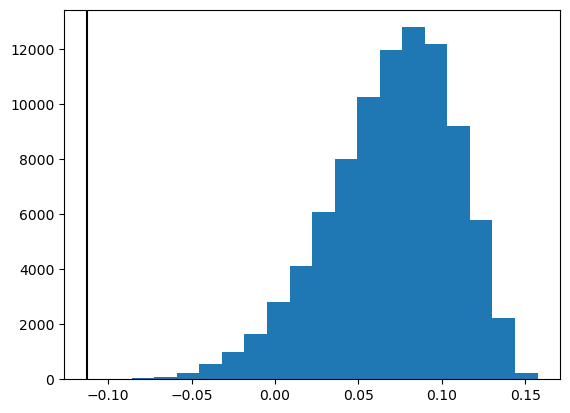

In [203]:
plt.hist(clf.decision_function(X), bins=20)
plt.axvline(np.min(clf.decision_function(X)[np.where(outliers== -1)]), c='k')
plt.show()

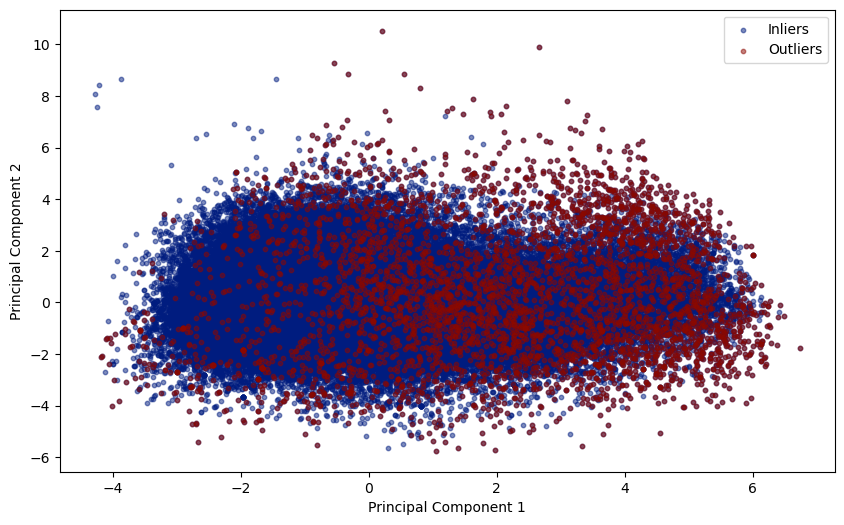

In [204]:
# Plot dei punti ridotti
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], label='Inliers', color=sns.color_palette(palette)[0],  alpha=0.5,  s=10)
plt.scatter(X_pca[outlier_if, 0], X_pca[outlier_if, 1], label='Outliers',color=sns.color_palette(palette)[3],  alpha=0.5,  s=10)
#plt.title('PCA plot of outliers detected by LOF')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


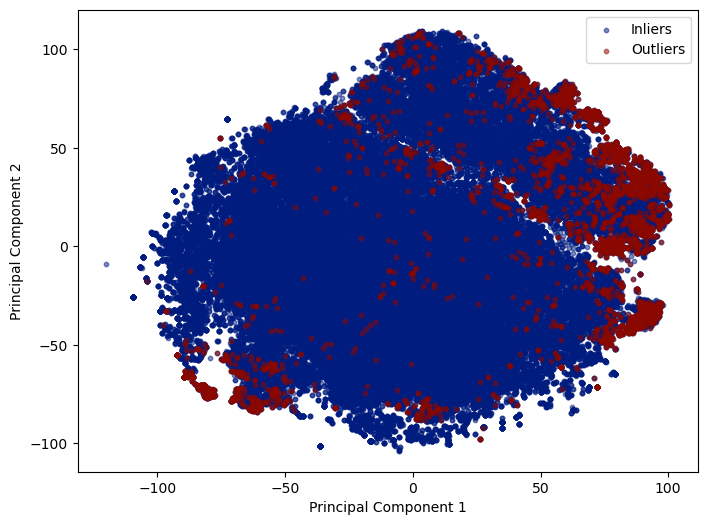

In [205]:

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], label='Inliers', color=sns.color_palette(palette)[0],  alpha=0.5,  s=10)
plt.scatter(X_tsne[outlier_if, 0], X_tsne[outlier_if, 1], label='Outliers', color=sns.color_palette(palette)[3],  alpha=0.5,  s=10)
#plt.title('t-sne plot of outliers detected by KNN')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

## depth based

In [206]:
from sklearn.covariance import EllipticEnvelope

In [207]:
ellenv = EllipticEnvelope(contamination=0.05, random_state=0)
ellenv.fit(X)

EllipticEnvelope(contamination=0.05, random_state=0)

In [208]:
# predict returns 1 for an inlier and -1 for an outlier
outliers = ellenv.predict(X)

In [209]:
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([ 4454, 84614], dtype=int64))

In [210]:
outlier_ee = np.where(outliers == -1)[0]
print(len(outlier_ee))

4454


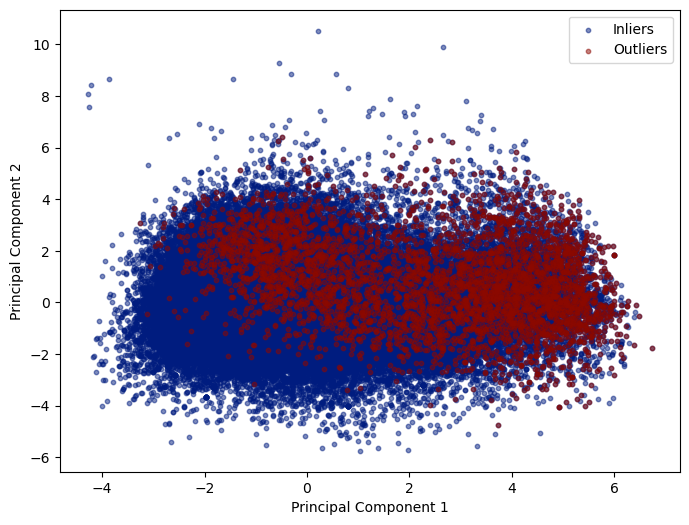

In [211]:
# Plot dei punti ridotti
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], label='Inliers', color=sns.color_palette(palette)[0],  alpha=0.5,  s=10)
plt.scatter(X_pca[outlier_ee, 0], X_pca[outlier_ee, 1], label='Outliers', color=sns.color_palette(palette)[3],  alpha=0.5,  s=10)
#plt.title('PCA plot of outliers detected by LOF')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


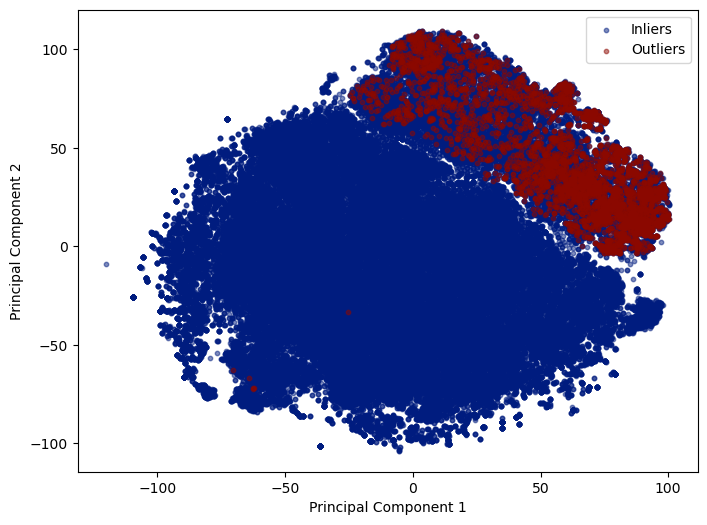

In [212]:

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], label='Inliers', color=sns.color_palette(palette)[0],  alpha=0.5,  s=10)
plt.scatter(X_tsne[outlier_ee, 0], X_tsne[outlier_ee, 1], label='Outliers', color=sns.color_palette(palette)[3],  alpha=0.5,  s=10)
#plt.title('t-sne plot of outliers detected by KNN')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

ANGLE BASED

abod

In [213]:
from pyod.models.abod import ABOD

In [214]:
clf = ABOD(contamination=0.05, n_neighbors= 50, method='fast')
clf.fit(X)

ABOD(contamination=0.05, method='fast', n_neighbors=50)

In [215]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([84677,  4391], dtype=int64))

In [216]:
outlier_abod = np.where(outliers == 1)[0]
print(len(outlier_abod))

4391


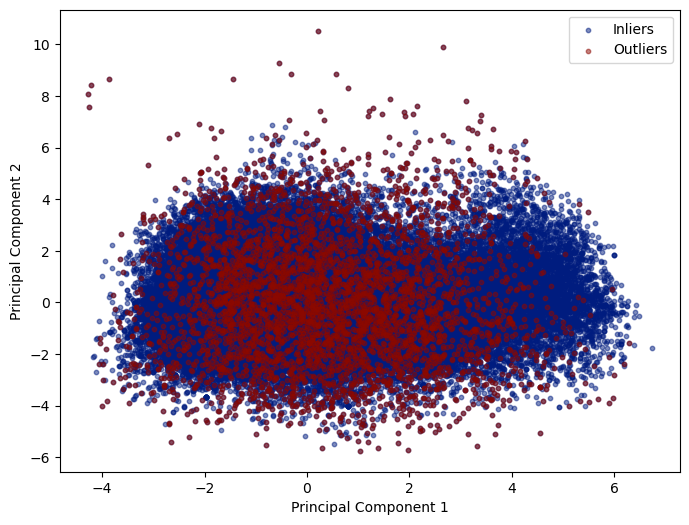

In [217]:
# Plot dei punti ridotti
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], label='Inliers', color=sns.color_palette(palette)[0],  alpha=0.5,  s=10)
plt.scatter(X_pca[outlier_abod, 0], X_pca[outlier_abod, 1], label='Outliers', color=sns.color_palette(palette)[3],  alpha=0.5,  s=10)
#plt.title('PCA plot of outliers detected by LOF')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


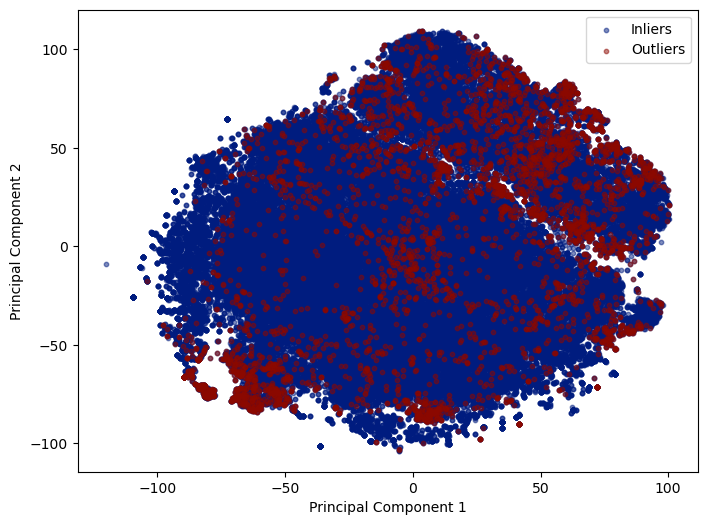

In [218]:

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], label='Inliers', color=sns.color_palette(palette)[0],  alpha=0.5,  s=10)
plt.scatter(X_tsne[outlier_abod, 0], X_tsne[outlier_abod, 1], label='Outliers', color=sns.color_palette(palette)[3],  alpha=0.5,  s=10)
#plt.title('t-sne plot of outliers detected by KNN')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

### Final comprehensive plots of outliers

In [219]:
# indici di tutti gli outliers trovati
print(len(outlier_abod))
print(len(outlier_lof))
print(len(outlier_knn))
print()
print(len(outlier_ee))
print(len(outlier_if))

4391
3081
4085

4454
4454


In [220]:
# Trova gli indici comuni
outliers_comuni = set(outlier_abod) & set(outlier_lof) & set(outlier_knn) 
print(len(outliers_comuni))

# Trasformare il set in un array numpy
outliers_comuni = np.array(list(outliers_comuni))


1118


In [221]:
df_out = df.copy()

In [222]:
# Crea una nuova colonna nel dataframe df per gli outliers
df_out['outlier'] = 0

# Imposta 1 nella colonna 'outlier' per le righe che sono outliers comuni
df_out.loc[list(outliers_comuni), 'outlier'] = 1
df_out

duration_ms  popularity  danceability    energy  loudness  speechiness  \
0         0.797420    0.947858     -0.186041 -0.472092 -0.588997     1.938632   
1         2.550119    0.623286      1.063136 -1.167680 -1.142236    -1.067093   
2         0.543118    0.345082      1.355375  0.007353 -0.764607     1.004903   
3         1.592682   -1.463244      0.633373 -0.369915 -1.010613     0.366106   
4         0.385608   -1.463244      1.126168  0.133109 -1.234849    -0.443351   
...            ...         ...           ...       ...       ...          ...   
89063    -0.061779   -0.396795     -0.564232  1.355300  1.637100     0.608776   
89064    -0.110350    1.133327      0.581802  0.325672  0.936856    -1.645092   
89065    -0.235874    2.246143      1.424137 -0.039806  0.749566    -0.122951   
89066    -0.073532    1.318797      0.507310  0.557535  1.449257    -0.592442   
89067    -0.146664    1.179694      1.166279 -0.758973 -0.166873     0.710738   

       acousticness  instrumentalness  liveness   valence  ...   n_beats  \
0          0.659428          1.766613 -0.889812 -0.888017  ...  1.152045   
1         -0.469639          1.816690 -0.530867 -1.246693  ...  2.193447   
2         -0.879669          1.718254 -1.272670 -0.578946  ...  0.435994   
3         -0.822027          1.836646 -0.443037 -1.657261  ...  1.533392   
4          0.558406          1.867806 -0.401379 -1.345901  ...  0.335164   
...             ...               ...       ...       ...  ...       ...   
89063     -0.940847          1.534564  1.111459 -0.388162  ...  0.718447   
89064      0.136492         -0.616040 -1.018318 -0.609472  ... -0.458242   
89065     -0.736753         -0.605343 -0.200804  1.256403  ... -0.027072   
89066      0.139463         -0.616016 -2.392504 -0.323295  ... -0.340721   
89067     -0.633057         -0.562052 -0.049764  0.348267  ... -0.677879   

       popularity_artist  followers_artist  explicit  key  mode  \
0               0.157456         -0.277164         0    0     1   
1              -0.067569         -0.275450         0    5     0   
2              -0.236338         -0.292966         0    7     0   
3              -0.573877         -0.286607         0    6     0   
4              -0.180082         -0.273545         0   11     0   
...                  ...               ...       ...  ...   ...   
89063           1.320089          1.250663         1    5     0   
89064          -0.067569         -0.300284         1    9     1   
89065           1.929533          1.725765         1   11     0   
89066          -0.320723         -0.301306         0    0     1   
89067          -0.489492          0.047399         0    1     1   

       time_signature           genre  emotion  outlier  
0                   3  minimal-techno  nervous        0  
1                   4  minimal-techno    bored        0  
2                   3  minimal-techno  nervous        0  
3                   4  minimal-techno  nervous        0  
4                   4  minimal-techno  nervous        0  
...               ...             ...      ...      ...  
89063               4             edm  excited        0  
89064               4             edm  nervous        0  
89065               4             edm  pleased        0  
89066               4             edm  excited        0  
89067               4         hip-hop     calm        0  

[89068 rows x 25 columns]

In [223]:
df_out[df_out['outlier'] == 1]


duration_ms  popularity  danceability    energy  loudness  speechiness  \
78       -0.230412   -1.277775      1.063136  0.121319  0.179388    -0.400827   
79        1.818980   -0.489530      1.596042 -0.648937 -0.998384     1.034853   
109       1.641171   -0.489530      1.441327  0.082020  0.248608     0.282522   
273       0.738487    2.617082      2.203440  0.093810  1.023351     0.181380   
339      -0.424657    1.689735      1.533010 -0.629287  0.142302    -0.143684   
...            ...         ...           ...       ...       ...          ...   
88706    -0.837280    0.623286      0.690675  1.001611  2.183173    -0.574327   
88820    -0.534051    0.113246     -0.329295  1.091998  0.828675    -1.050161   
88832     1.271754    0.252348     -1.790488 -0.770763 -0.041373     0.736093   
89024     0.182454    1.040592      0.455738  0.954453  3.368874     1.715624   
89062    -1.436174    1.086960      0.948533  1.194175  0.362146     1.285785   

       acousticness  instrumentalness  liveness   valence  ...   n_beats  \
78        -0.964215          1.859011 -2.740261 -1.675958  ... -0.094207   
79        -0.944769          1.868592  0.763676  1.828757  ...  1.452349   
109       -0.956148          1.864843 -4.196824  0.222350  ...  1.476586   
273       -0.876103         -0.616040 -2.081897  1.099959  ...  0.344078   
339       -0.944293         -0.614914  0.432353  1.420477  ... -0.684444   
...             ...               ...       ...       ...  ...       ...   
88706     -0.960486          1.827640 -0.515787 -1.532107  ... -0.375419   
88820     -0.848174         -0.580642  0.301910 -0.613287  ...  0.028448   
88832     -0.808954          1.840300 -0.428992 -1.601934  ...  1.485626   
89024     -0.898982          1.771728  1.606416 -0.216455  ... -0.785044   
89062     -0.894525          1.761862 -0.296858 -1.517225  ... -1.014420   

       popularity_artist  followers_artist  explicit  key  mode  \
78             -2.655364         -0.306434         0    7     1   
79              0.776277         -0.149472         0    0     1   
109            -0.517620         -0.290098         0    6     0   
273             2.238944          9.728892         1    5     0   
339             1.395097          3.012495         0    0     1   
...                  ...               ...       ...  ...   ...   
88706          -0.967672         -0.305906         0    2     1   
88820          -1.924031         -0.306331         0    5     0   
88832           0.860662         -0.192802         0    6     0   
89024           0.663764         -0.276003         0   10     0   
89062           1.451354          1.470690         0    1     1   

       time_signature           genre  emotion  outlier  
78                  4  minimal-techno  nervous        1  
79                  4  minimal-techno  relaxed        1  
109                 4  minimal-techno     calm        1  
273                 4         hip-hop  pleased        1  
339                 4         hip-hop  relaxed        1  
...               ...             ...      ...      ...  
88706               4             dub    angry        1  
88820               5         dubstep    angry        1  
88832               4         dubstep    bored        1  
89024               4         dubstep  excited        1  
89062               4             edm    angry        1  

[1118 rows x 25 columns]

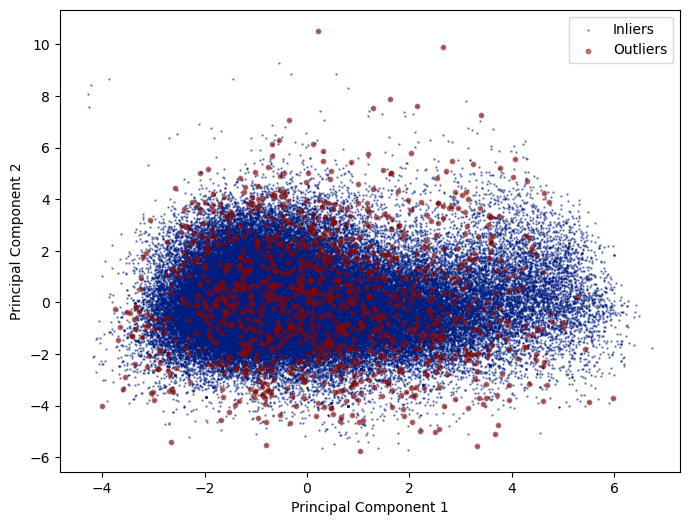

In [243]:
# Plot dei punti ridotti
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], label='Inliers', color=sns.color_palette(palette)[0],  alpha=0.5,  s=0.5)
plt.scatter(X_pca[outliers_comuni, 0], X_pca[outliers_comuni, 1], label='Outliers', color=sns.color_palette(palette)[3],  alpha=0.5,  s=10)
#plt.title('PCA plot of outliers detected by LOF')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


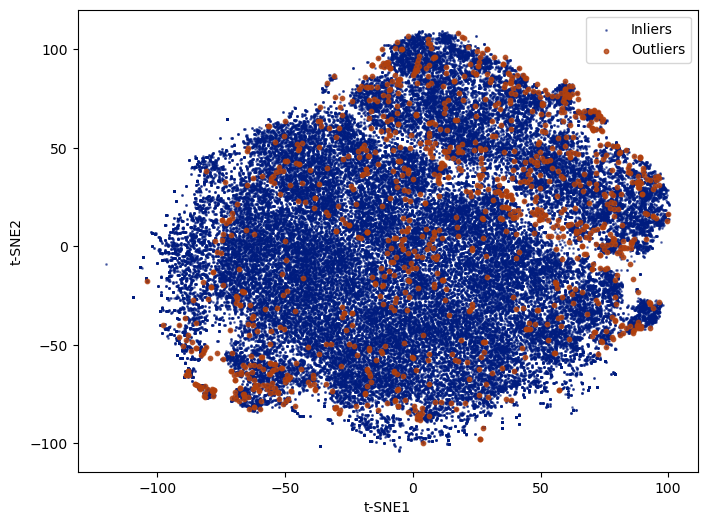

In [238]:
palette = 'dark'  # 'deep', 'muted', 'bright', 'pastel', 'dark', 'colorblind'

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], label='Inliers', color=sns.color_palette(palette)[0],  alpha=0.5,  s=1)
plt.scatter(X_tsne[outliers_comuni, 0], X_tsne[outliers_comuni, 1], label='Outliers', color=sns.color_palette(palette)[1],  alpha=0.8, s=10) #0.8 e 30
#plt.title('t-sne plot of outliers detected by KNN')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.legend()
plt.show()

In [239]:
result_df = pd.DataFrame()

# Aggiunta della colonna 'emotion' al risultato
result_df['emotion'] = df_out['emotion']

# Funzione per etichettare le righe come outlier o non-outlier
def label_outlier(row_index, outlier_array):
    if row_index in outlier_array:
        return 1
    else:
        return 0

# Applicazione della funzione per etichettare le righe
result_df['outlier_abod'] = df.index.map(lambda x: label_outlier(x, outlier_if))
result_df['outlier_lof'] = df.index.map(lambda x: label_outlier(x, outlier_lof))
result_df['outlier_knn'] = df.index.map(lambda x: label_outlier(x, outlier_knn))

result_df

emotion  outlier_abod  outlier_lof  outlier_knn
0      nervous             0            0            0
1        bored             0            0            0
2      nervous             0            0            0
3      nervous             0            0            0
4      nervous             0            0            0
...        ...           ...          ...          ...
89063  excited             0            0            0
89064  nervous             0            0            0
89065  pleased             0            0            0
89066  excited             0            0            0
89067     calm             0            0            0

[89068 rows x 4 columns]

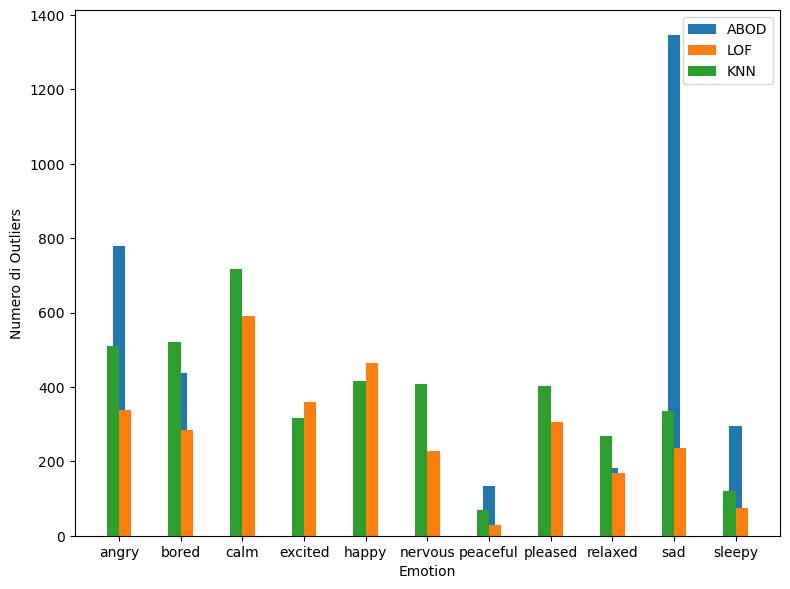

In [240]:
import matplotlib.pyplot as plt

# Gruppo per 'emotion' e conteggio degli outliers per ogni metodo
outlier_counts = result_df.groupby('emotion').agg({
    'outlier_abod': lambda x: (x == 1).sum(),
    'outlier_lof': lambda x: (x == 1).sum(),
    'outlier_knn': lambda x: (x == 1).sum()
})

# Creazione del plot
plt.figure(figsize=(8, 6))

# Plot degli istogrammi per ciascun metodo
plt.bar(outlier_counts.index, outlier_counts['outlier_abod'], width=0.2, align='center', label='ABOD')
plt.bar(outlier_counts.index, outlier_counts['outlier_lof'], width=0.2, align='edge', label='LOF')
plt.bar(outlier_counts.index, outlier_counts['outlier_knn'], width=-0.2, align='edge', label='KNN')

# Impostazione dei titoli e delle etichette
#plt.title('Numero di Outliers per Emotion e Metodo')
plt.xlabel('Emotion')
plt.ylabel('Numero di Outliers')
plt.legend()

# Mostra il plot
plt.tight_layout()
plt.show()


### ALLA FINE RIMUOVO GLI OUTLIERS E SALVO DATASET FINALE

In [245]:
df_out.columns

Index(['duration_ms', 'popularity', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'tempo_confidence', 'time_signature_confidence',
       'key_confidence', 'mode_confidence', 'n_beats', 'popularity_artist',
       'followers_artist', 'explicit', 'key', 'mode', 'time_signature',
       'genre', 'emotion', 'outlier'],
      dtype='object')

In [246]:
df_out.head()

duration_ms  popularity  danceability    energy  loudness  speechiness  \
0     0.797420    0.947858     -0.186041 -0.472092 -0.588997     1.938632   
1     2.550119    0.623286      1.063136 -1.167680 -1.142236    -1.067093   
2     0.543118    0.345082      1.355375  0.007353 -0.764607     1.004903   
3     1.592682   -1.463244      0.633373 -0.369915 -1.010613     0.366106   
4     0.385608   -1.463244      1.126168  0.133109 -1.234849    -0.443351   

   acousticness  instrumentalness  liveness   valence  ...   n_beats  \
0      0.659428          1.766613 -0.889812 -0.888017  ...  1.152045   
1     -0.469639          1.816690 -0.530867 -1.246693  ...  2.193447   
2     -0.879669          1.718254 -1.272670 -0.578946  ...  0.435994   
3     -0.822027          1.836646 -0.443037 -1.657261  ...  1.533392   
4      0.558406          1.867806 -0.401379 -1.345901  ...  0.335164   

   popularity_artist  followers_artist  explicit  key  mode  time_signature  \
0           0.157456         -0.277164         0    0     1               3   
1          -0.067569         -0.275450         0    5     0               4   
2          -0.236338         -0.292966         0    7     0               3   
3          -0.573877         -0.286607         0    6     0               4   
4          -0.180082         -0.273545         0   11     0               4   

            genre  emotion  outlier  
0  minimal-techno  nervous        0  
1  minimal-techno    bored        0  
2  minimal-techno  nervous        0  
3  minimal-techno  nervous        0  
4  minimal-techno  nervous        0  

[5 rows x 25 columns]

In [247]:
# Rimuovi le righe con 'outliers' uguale a 1
print(df_out.shape)
df_final = df_out[df_out['outlier'] != 1]
print(df_final.shape)

(89068, 25)
(87950, 25)


In [248]:
#to_drop = ['outlier', 'energy', 'valence']

to_drop = ['outlier']
df_final = df_final.drop(to_drop,axis=1)
print(df_final.shape)

(87950, 24)


In [249]:
df_final.to_csv(r'C:\Users\HUAWEI\Desktop\DM2\project NEW\output_data\df_SenzaOutlier.csv', index=False)

controllo correlation

In [250]:
df_final.columns

Index(['duration_ms', 'popularity', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'tempo_confidence', 'time_signature_confidence',
       'key_confidence', 'mode_confidence', 'n_beats', 'popularity_artist',
       'followers_artist', 'explicit', 'key', 'mode', 'time_signature',
       'genre', 'emotion'],
      dtype='object')

In [251]:
cat_var = ['explicit', 'key', 'mode', 'time_signature', 'genre', 'emotion']

num_var = ['duration_ms', 'popularity', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'tempo_confidence', 'time_signature_confidence',
       'key_confidence', 'mode_confidence', 'n_beats', 'popularity_artist', 'followers_artist' ]

print(len(cat_var))
print(len(num_var))

6
18


correlazione

In [252]:
df_num = df_final[(num_var)]
df_num.columns

Index(['duration_ms', 'popularity', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'tempo_confidence', 'time_signature_confidence',
       'key_confidence', 'mode_confidence', 'n_beats', 'popularity_artist',
       'followers_artist'],
      dtype='object')

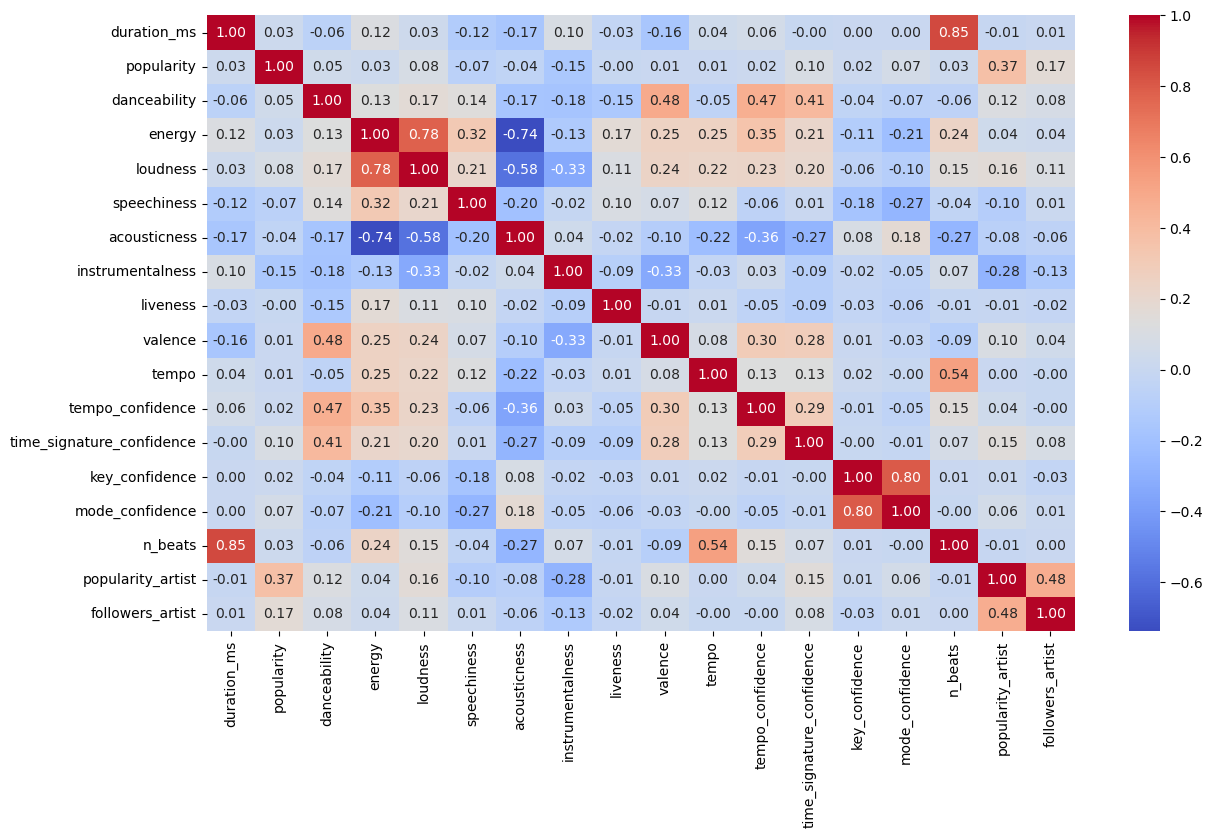

In [253]:
import seaborn as sns
import matplotlib.pyplot as plt


# Calcola la matrice di correlazione
corr_matrix = df_num.corr()

# Crea il grafico della matrice di correlazione
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
#plt.title('Matrice di correlazione')
plt.show()


In [255]:
#### eliminazione per alta correlazione
corr_matrix = df_num.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95 o 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)] 
print(len(to_drop))
to_drop

1


['n_beats']

In [256]:
def get_high_correlation_indexes(cm, threshold):
    high_indexes = np.where(np.abs(cm) > threshold)
    high_indexes = [(cm.index[x], cm.columns[y]) for x, y in zip(*high_indexes)
                                        if x != y and x < y]
    return high_indexes

def print_high_correlations(dataframe, threshold = 0.95):
    cm = dataframe.corr()
    hi = get_high_correlation_indexes(cm, threshold)
    for index in hi:
        print(f"{index[0]} x {index[1]}\n")

In [257]:
print_high_correlations(df_num, threshold = 0.85)

duration_ms x n_beats



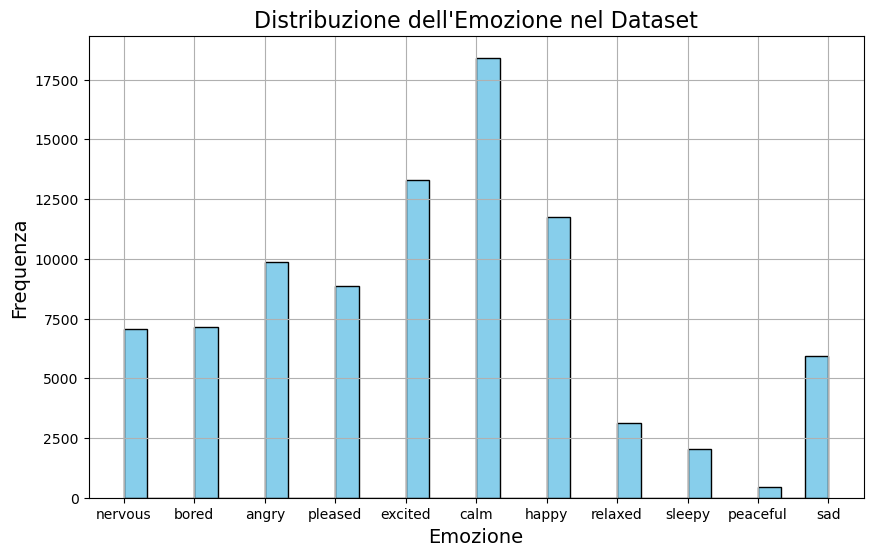

In [260]:
import pandas as pd
import matplotlib.pyplot as plt

# Assicurati di avere caricato correttamente il dataset df_final
# Supponendo che "emotion" sia una colonna del dataframe df_final

# Creazione dell'istogramma
plt.figure(figsize=(10, 6))
plt.hist(df_final['emotion'], bins=30, color='skyblue', edgecolor='black')

# Personalizzazione dell'istogramma
plt.title('Distribuzione dell\'Emozione nel Dataset', fontsize=16)
plt.xlabel('Emozione', fontsize=14)
plt.ylabel('Frequenza', fontsize=14)
plt.grid(True)

# Mostra l'istogramma
plt.show()


In [261]:
df_final

duration_ms  popularity  danceability    energy  loudness  speechiness  \
0         0.797420    0.947858     -0.186041 -0.472092 -0.588997     1.938632   
1         2.550119    0.623286      1.063136 -1.167680 -1.142236    -1.067093   
2         0.543118    0.345082      1.355375  0.007353 -0.764607     1.004903   
3         1.592682   -1.463244      0.633373 -0.369915 -1.010613     0.366106   
4         0.385608   -1.463244      1.126168  0.133109 -1.234849    -0.443351   
...            ...         ...           ...       ...       ...          ...   
89063    -0.061779   -0.396795     -0.564232  1.355300  1.637100     0.608776   
89064    -0.110350    1.133327      0.581802  0.325672  0.936856    -1.645092   
89065    -0.235874    2.246143      1.424137 -0.039806  0.749566    -0.122951   
89066    -0.073532    1.318797      0.507310  0.557535  1.449257    -0.592442   
89067    -0.146664    1.179694      1.166279 -0.758973 -0.166873     0.710738   

       acousticness  instrumentalness  liveness   valence  ...  \
0          0.659428          1.766613 -0.889812 -0.888017  ...   
1         -0.469639          1.816690 -0.530867 -1.246693  ...   
2         -0.879669          1.718254 -1.272670 -0.578946  ...   
3         -0.822027          1.836646 -0.443037 -1.657261  ...   
4          0.558406          1.867806 -0.401379 -1.345901  ...   
...             ...               ...       ...       ...  ...   
89063     -0.940847          1.534564  1.111459 -0.388162  ...   
89064      0.136492         -0.616040 -1.018318 -0.609472  ...   
89065     -0.736753         -0.605343 -0.200804  1.256403  ...   
89066      0.139463         -0.616016 -2.392504 -0.323295  ...   
89067     -0.633057         -0.562052 -0.049764  0.348267  ...   

       mode_confidence   n_beats  popularity_artist  followers_artist  \
0             0.079080  1.152045           0.157456         -0.277164   
1             0.430642  2.193447          -0.067569         -0.275450   
2             1.369974  0.435994          -0.236338         -0.292966   
3            -0.041770  1.533392          -0.573877         -0.286607   
4            -0.283469  0.335164          -0.180082         -0.273545   
...                ...       ...                ...               ...   
89063        -1.805076  0.718447           1.320089          1.250663   
89064         0.134011 -0.458242          -0.067569         -0.300284   
89065        -0.992088 -0.027072           1.929533          1.725765   
89066         0.513040 -0.340721          -0.320723         -0.301306   
89067         1.095315 -0.677879          -0.489492          0.047399   

       explicit  key  mode  time_signature           genre  emotion  
0             0    0     1               3  minimal-techno  nervous  
1             0    5     0               4  minimal-techno    bored  
2             0    7     0               3  minimal-techno  nervous  
3             0    6     0               4  minimal-techno  nervous  
4             0   11     0               4  minimal-techno  nervous  
...         ...  ...   ...             ...             ...      ...  
89063         1    5     0               4             edm  excited  
89064         1    9     1               4             edm  nervous  
89065         1   11     0               4             edm  pleased  
89066         0    0     1               4             edm  excited  
89067         0    1     1               4         hip-hop     calm  

[87950 rows x 24 columns]

In [ ]:
df['popularity'] = scaler.inverse_transform(df[['popularity']])
df